# Laboratorio 2 - Series de tiempo

* José Eduardo López Gómez (181045)
* Karina Alejandra Valladares Díaz (18005)
* Alexa Carolina Bravo (18831)
* Esteban Cabrera (17781)




De forma inicial, se importan las librerias necesarias para trabajar. Además de las usuales, como *numpy*, se utilizará *pandas* para el manejo de las bases de datos, *matplotlib* para crear gráficas, *datetime* para crear formato en fechas y *seaborn* y *seasonal_decompose* para manejar las series de tiempo.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime

Creamos una función que determina, como vector, las fechas de cada registro en los datos. Luego, se sobreescribe esta columna en el *dataframe*, con el fin de manejarlo más adelante dentro de las gráficas y el estudio de los datos.

In [ ]:
def formato_fecha(df):
    fechas = []
    for i in range(0, len(df)):
        fecha = str(datetime.date(int(df["Anio"][i]), int(df["Mes"][i]), 1))
        fechas.append(fecha)
    
    df["Fechas"] = fechas

Leemos ambos *.csv* en cuestión:

In [ ]:
imp_com_id = pd.read_csv("DatosImportacionCombustibles.csv")
con_com_id = pd.read_csv("DatosConsumoCombustibles.csv")

Para el dataframe **datos importaciones combustibles**, puede observarse que se cuenta con 245 filas y 29 columnas, dentro de las cuales existe una cantidad considerable de datos no disponibles (NaN). En particular, a primera vista esto es evidente para las columnas de "DieselLS", "DieselULS", "Solventes", "Naftas", "Ceras", "Butano", "Orimulsion", "MezclasOleosas" y "PetroleoCrudo".

In [ ]:
imp_com_id

,Unnamed: 0,Anio,Mes,GasolinaSuper,GasolinaRegular,TotalGasolinas,Diesel,DieselLS,DieselULS,TotalDiesel,...,Solventes,Naftas,Ceras,Butano,PetroleoReconstit,MTBE,Orimulsion,MezclasOleosas,PetroleoCrudo,TotalMensual
0,3,2001,1,373963.96,177776.50,551740.46,566101.99,NaN,NaN,566101.99,...,NaN,NaN,NaN,NaN,715344.0,8402.0,NaN,NaN,NaN,2312639.05
1,4,2001,2,243091.07,123115.99,366207.06,489525.80,NaN,NaN,489525.80,...,NaN,NaN,NaN,NaN,370166.0,NaN,NaN,NaN,NaN,1769208.76
2,5,2001,3,312084.38,161726.42,473810.80,575559.68,NaN,NaN,575559.68,...,NaN,NaN,NaN,NaN,360530.0,NaN,NaN,NaN,NaN,1945770.26
3,6,2001,4,285054.89,127338.74,412393.63,437745.42,NaN,NaN,437745.42,...,NaN,NaN,NaN,NaN,359527.0,8184.0,NaN,NaN,NaN,1623637.76
4,7,2001,5,300913.67,168730.19,469643.86,552609.13,NaN,NaN,552609.13,...,NaN,NaN,NaN,NaN,723346.0,12680.0,NaN,NaN,NaN,2262726.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,316,2021,1,642652.37,626537.48,1269189.85,NaN,1185644.96,1499.38,1187144.34,...,13170.43,NaN,158.88,NaN,NaN,NaN,NaN,285.71,NaN,3448035.88
241,416,2021,2,726508.78,715261.34,1441770.12,NaN,1076824.67,1203.34,1078028.01,...,13709.49,2.85,597.30,NaN,NaN,NaN,NaN,1941.72,NaN,3309208.50
242,516,2021,3,850334.64,772750.01,1623084.65,NaN,1345110.18,13415.05,1358525.23,...,3207.39,48.00,329.90,NaN,NaN,NaN,NaN,1543.65,NaN,4151784.70
243,66,2021,4,1227173.53,634408.89,1861582.42,NaN,1250171.58,39568.59,1289740.17,...,18218.88,NaN,331.40,NaN,NaN,NaN,NaN,1008.98,191.0,4067846.94


Para el dataframe **datos consumo combustibles**, puede observarse que se cuenta con 257 filas y 27 columnas, dentro de las cuales existe una cantidad considerable de datos no disponibles (NaN). En particular, a primera vista esto es evidente para las columnas de "DieselLS", "DieselULS", "Solventes", "Naftas", "Ceras", "Butano", "Orimulsion", "MezclasOleosas" y "PetroleoCrudo".

In [ ]:
con_com_id

,Unnamed: 0,Anio,Mes,GasolinaSuper,GasolinaRegular,TotalGasolinas,Diesel,DieselLS,DieselULS,TotalDiesel,...,AceitesLubricantes,GrasasLubricantes,Solventes,Naftas,Ceras,CrudoNacional,Butano,Orimulsion,MezclasOleosas,Total
0,3,2000,1,308156.82,202645.20,510802.02,634667.06,NaN,NaN,634667.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1750544.64
1,4,2000,2,307766.31,205530.96,513297.27,642380.66,NaN,NaN,642380.66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1773220.22
2,5,2000,3,331910.29,229499.56,561409.85,699807.25,NaN,NaN,699807.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909498.79
3,6,2000,4,315648.08,210680.40,526328.48,586803.98,NaN,NaN,586803.98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1800932.86
4,7,2000,5,319667.97,208164.34,527832.31,656948.20,NaN,NaN,656948.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1941771.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,194,2021,1,655503.47,685942.85,1341446.32,NaN,1220513.47,12064.41,1232577.88,...,28854.20,452.17,13958.41,88.32,NaN,108756.0,NaN,NaN,285.71,3507363.69
253,204,2021,2,621730.81,669313.36,1291044.17,NaN,1272593.63,10943.51,1283537.14,...,20240.35,709.18,9576.59,42.85,NaN,110937.0,NaN,NaN,NaN,3644007.36
254,214,2021,3,692228.61,679366.06,1371594.67,NaN,1417534.72,10508.49,1428043.21,...,27772.01,417.13,11000.25,95.13,NaN,104570.0,NaN,NaN,NaN,3862739.86
255,224,2021,4,610290.32,688389.15,1298679.47,NaN,1268514.31,9876.20,1278390.51,...,25691.62,441.80,12753.37,31.83,NaN,108795.0,NaN,NaN,83.00,3622666.65


Se eliminan las columnas innecesarias, dado que no contienen datos relevantes.

In [ ]:
imp_com = imp_com_id.drop(columns = "Unnamed: 0")
con_com = con_com_id.drop(columns = "Unnamed: 0")

In [ ]:
imp_com

,Anio,Mes,GasolinaSuper,GasolinaRegular,TotalGasolinas,Diesel,DieselLS,DieselULS,TotalDiesel,GLP,...,Solventes,Naftas,Ceras,Butano,PetroleoReconstit,MTBE,Orimulsion,MezclasOleosas,PetroleoCrudo,TotalMensual
0,2001,1,373963.96,177776.50,551740.46,566101.99,NaN,NaN,566101.99,194065.74,...,NaN,NaN,NaN,NaN,715344.0,8402.0,NaN,NaN,NaN,2312639.05
1,2001,2,243091.07,123115.99,366207.06,489525.80,NaN,NaN,489525.80,170703.38,...,NaN,NaN,NaN,NaN,370166.0,NaN,NaN,NaN,NaN,1769208.76
2,2001,3,312084.38,161726.42,473810.80,575559.68,NaN,NaN,575559.68,161837.37,...,NaN,NaN,NaN,NaN,360530.0,NaN,NaN,NaN,NaN,1945770.26
3,2001,4,285054.89,127338.74,412393.63,437745.42,NaN,NaN,437745.42,163048.64,...,NaN,NaN,NaN,NaN,359527.0,8184.0,NaN,NaN,NaN,1623637.76
4,2001,5,300913.67,168730.19,469643.86,552609.13,NaN,NaN,552609.13,171518.86,...,NaN,NaN,NaN,NaN,723346.0,12680.0,NaN,NaN,NaN,2262726.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2021,1,642652.37,626537.48,1269189.85,NaN,1185644.96,1499.38,1187144.34,475619.63,...,13170.43,NaN,158.88,NaN,NaN,NaN,NaN,285.71,NaN,3448035.88
241,2021,2,726508.78,715261.34,1441770.12,NaN,1076824.67,1203.34,1078028.01,617782.99,...,13709.49,2.85,597.30,NaN,NaN,NaN,NaN,1941.72,NaN,3309208.50
242,2021,3,850334.64,772750.01,1623084.65,NaN,1345110.18,13415.05,1358525.23,604151.98,...,3207.39,48.00,329.90,NaN,NaN,NaN,NaN,1543.65,NaN,4151784.70
243,2021,4,1227173.53,634408.89,1861582.42,NaN,1250171.58,39568.59,1289740.17,664443.94,...,18218.88,NaN,331.40,NaN,NaN,NaN,NaN,1008.98,191.0,4067846.94


In [ ]:
con_com

,Anio,Mes,GasolinaSuper,GasolinaRegular,TotalGasolinas,Diesel,DieselLS,DieselULS,TotalDiesel,GLP,...,AceitesLubricantes,GrasasLubricantes,Solventes,Naftas,Ceras,CrudoNacional,Butano,Orimulsion,MezclasOleosas,Total
0,2000,1,308156.82,202645.20,510802.02,634667.06,NaN,NaN,634667.06,194410.48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1750544.64
1,2000,2,307766.31,205530.96,513297.27,642380.66,NaN,NaN,642380.66,174710.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1773220.22
2,2000,3,331910.29,229499.56,561409.85,699807.25,NaN,NaN,699807.25,189234.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909498.79
3,2000,4,315648.08,210680.40,526328.48,586803.98,NaN,NaN,586803.98,174330.61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1800932.86
4,2000,5,319667.97,208164.34,527832.31,656948.20,NaN,NaN,656948.20,191745.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1941771.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,2021,1,655503.47,685942.85,1341446.32,NaN,1220513.47,12064.41,1232577.88,472353.44,...,28854.20,452.17,13958.41,88.32,NaN,108756.0,NaN,NaN,285.71,3507363.69
253,2021,2,621730.81,669313.36,1291044.17,NaN,1272593.63,10943.51,1283537.14,440394.46,...,20240.35,709.18,9576.59,42.85,NaN,110937.0,NaN,NaN,NaN,3644007.36
254,2021,3,692228.61,679366.06,1371594.67,NaN,1417534.72,10508.49,1428043.21,509273.77,...,27772.01,417.13,11000.25,95.13,NaN,104570.0,NaN,NaN,NaN,3862739.86
255,2021,4,610290.32,688389.15,1298679.47,NaN,1268514.31,9876.20,1278390.51,458849.58,...,25691.62,441.80,12753.37,31.83,NaN,108795.0,NaN,NaN,83.00,3622666.65


In [ ]:
con_com.columns

Index(['Anio', 'Mes', 'GasolinaSuper', 'GasolinaRegular', 'TotalGasolinas',
       'Diesel', 'DieselLS', 'DieselULS', 'TotalDiesel', 'GLP',
       'GasolinaAviacion', 'Kerosina', 'TurboJet', 'Bunker', 'Asfalto',
       'PetCoke', 'AceitesLubricantes', 'GrasasLubricantes', 'Solventes',
       'Naftas', 'Ceras', 'CrudoNacional', 'Butano', 'Orimulsion',
       'MezclasOleosas', 'Total'],
      dtype='object')

In [ ]:
imp_com.columns

Index(['Anio', 'Mes', 'GasolinaSuper', 'GasolinaRegular', 'TotalGasolinas',
       'Diesel', 'DieselLS', 'DieselULS', 'TotalDiesel', 'GLP',
       'GasolinaAviacion', 'Kerosina', 'TurboJet', 'Bunker', 'Asfalto',
       'PetCoke', 'AceitesLubricantes', 'GrasasLubricantes', 'Solventes',
       'Naftas', 'Ceras', 'Butano', 'PetroleoReconstit', 'MTBE', 'Orimulsion',
       'MezclasOleosas', 'PetroleoCrudo', 'TotalMensual'],
      dtype='object')

### Removemos todas las columnas que no vamos a utilizar

In [ ]:
data_con = con_com.drop(columns = ['GLP',
       'GasolinaAviacion', 'Kerosina', 'TurboJet', 'Bunker', 'Asfalto',
       'PetCoke', 'AceitesLubricantes', 'GrasasLubricantes', 'Solventes',
       'Naftas', 'Ceras', 'CrudoNacional', 'Butano', 'Orimulsion',
       'MezclasOleosas', 'DieselULS', 'TotalGasolinas', "Total", "TotalDiesel"])

data_imp = imp_com.drop(columns = ['GLP',
       'GasolinaAviacion', 'Kerosina', 'TurboJet', 'Bunker', 'Asfalto',
       'PetCoke', 'AceitesLubricantes', 'GrasasLubricantes', 'Solventes',
       'Naftas', 'Ceras', 'Butano', 'PetroleoReconstit', 'MTBE', 'Orimulsion',
       'MezclasOleosas', 'PetroleoCrudo', 'DieselULS', 'TotalGasolinas', "TotalMensual", "TotalDiesel"])

In [ ]:
data_con

,Anio,Mes,GasolinaSuper,GasolinaRegular,Diesel,DieselLS
0,2000,1,308156.82,202645.20,634667.06,NaN
1,2000,2,307766.31,205530.96,642380.66,NaN
2,2000,3,331910.29,229499.56,699807.25,NaN
3,2000,4,315648.08,210680.40,586803.98,NaN
4,2000,5,319667.97,208164.34,656948.20,NaN
...,...,...,...,...,...,...
252,2021,1,655503.47,685942.85,NaN,1220513.47
253,2021,2,621730.81,669313.36,NaN,1272593.63
254,2021,3,692228.61,679366.06,NaN,1417534.72
255,2021,4,610290.32,688389.15,NaN,1268514.31


In [ ]:
data_imp

,Anio,Mes,GasolinaSuper,GasolinaRegular,Diesel,DieselLS
0,2001,1,373963.96,177776.50,566101.99,NaN
1,2001,2,243091.07,123115.99,489525.80,NaN
2,2001,3,312084.38,161726.42,575559.68,NaN
3,2001,4,285054.89,127338.74,437745.42,NaN
4,2001,5,300913.67,168730.19,552609.13,NaN
...,...,...,...,...,...,...
240,2021,1,642652.37,626537.48,NaN,1185644.96
241,2021,2,726508.78,715261.34,NaN,1076824.67
242,2021,3,850334.64,772750.01,NaN,1345110.18
243,2021,4,1227173.53,634408.89,NaN,1250171.58


### Unimos los datos de Dieseil y Diesel Bajo en Azufre

In [ ]:
def agregar_diesel(df):
    for i in range(0, len(df)):
        if df["Anio"][i] == 2018 or df["Anio"][i] == 2019 or df["Anio"][i] == 2020 or df["Anio"][i] == 2021:
            df["Diesel"][i] = df["DieselLS"][i]
        else:
            df["Diesel"][i] == df["Diesel"][i]

In [ ]:
agregar_diesel(data_con)
agregar_diesel(data_imp)

<ipython-input-73-58d6877dc0a8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Diesel"][i] = df["DieselLS"][i]


In [ ]:
data_con

,Anio,Mes,GasolinaSuper,GasolinaRegular,Diesel,DieselLS
0,2000,1,308156.82,202645.20,634667.06,NaN
1,2000,2,307766.31,205530.96,642380.66,NaN
2,2000,3,331910.29,229499.56,699807.25,NaN
3,2000,4,315648.08,210680.40,586803.98,NaN
4,2000,5,319667.97,208164.34,656948.20,NaN
...,...,...,...,...,...,...
252,2021,1,655503.47,685942.85,1220513.47,1220513.47
253,2021,2,621730.81,669313.36,1272593.63,1272593.63
254,2021,3,692228.61,679366.06,1417534.72,1417534.72
255,2021,4,610290.32,688389.15,1268514.31,1268514.31


In [ ]:
data_imp

,Anio,Mes,GasolinaSuper,GasolinaRegular,Diesel,DieselLS
0,2001,1,373963.96,177776.50,566101.99,NaN
1,2001,2,243091.07,123115.99,489525.80,NaN
2,2001,3,312084.38,161726.42,575559.68,NaN
3,2001,4,285054.89,127338.74,437745.42,NaN
4,2001,5,300913.67,168730.19,552609.13,NaN
...,...,...,...,...,...,...
240,2021,1,642652.37,626537.48,1185644.96,1185644.96
241,2021,2,726508.78,715261.34,1076824.67,1076824.67
242,2021,3,850334.64,772750.01,1345110.18,1345110.18
243,2021,4,1227173.53,634408.89,1250171.58,1250171.58


In [ ]:
data_con.drop(columns = ["DieselLS"], inplace = True)
data_imp.drop(columns = ["DieselLS"],  inplace = True)

### Revisamos por datos nulos o faltantes en ambos sets de datos

In [ ]:
data_con.isna().sum().to_frame()

,0
Anio,0
Mes,0
GasolinaSuper,0
GasolinaRegular,0
Diesel,0


In [ ]:
data_imp.isna().sum().to_frame()

,0
Anio,0
Mes,0
GasolinaSuper,0
GasolinaRegular,0
Diesel,0


### Hacemos pair plos para ver la correlación

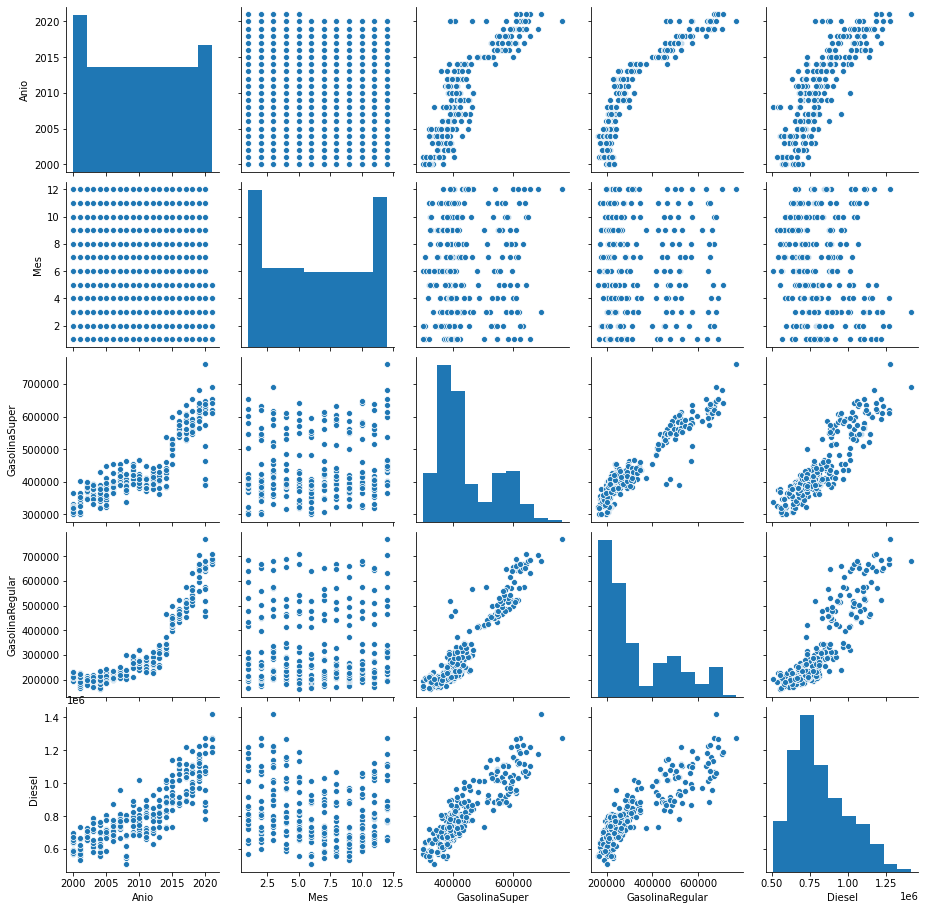

In [ ]:
sns.pairplot(data_con)

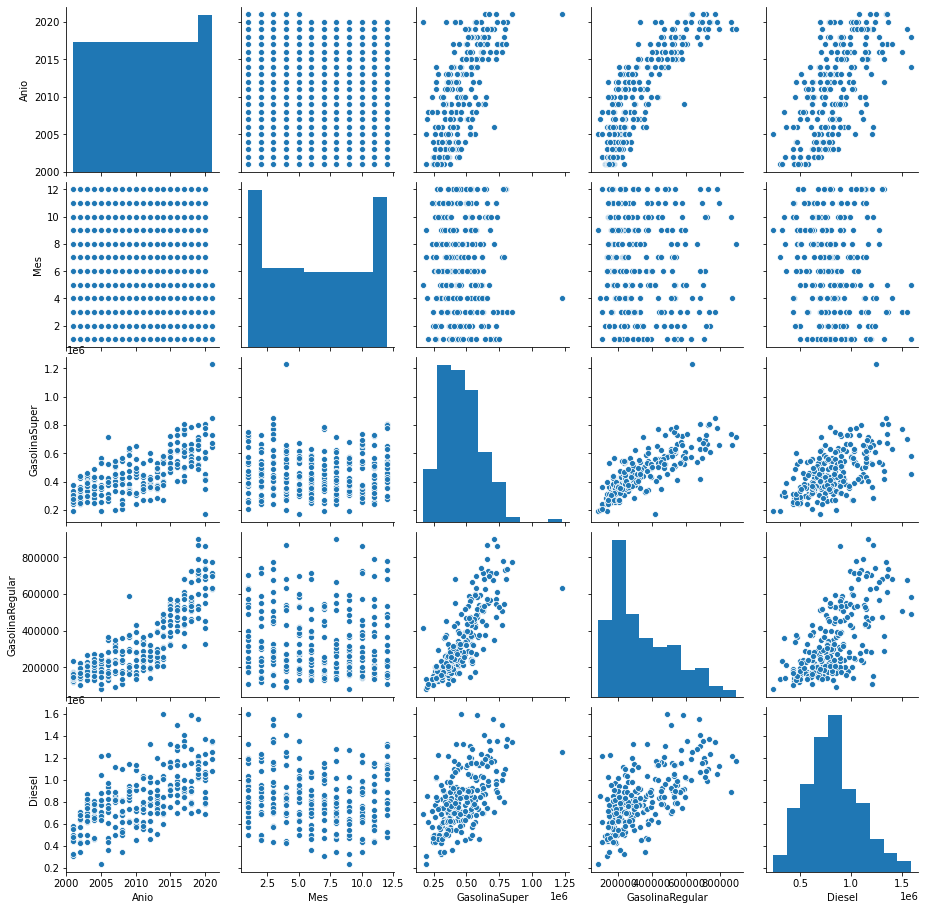

In [ ]:
sns.pairplot(data_imp)

### Box Plot para Consumo

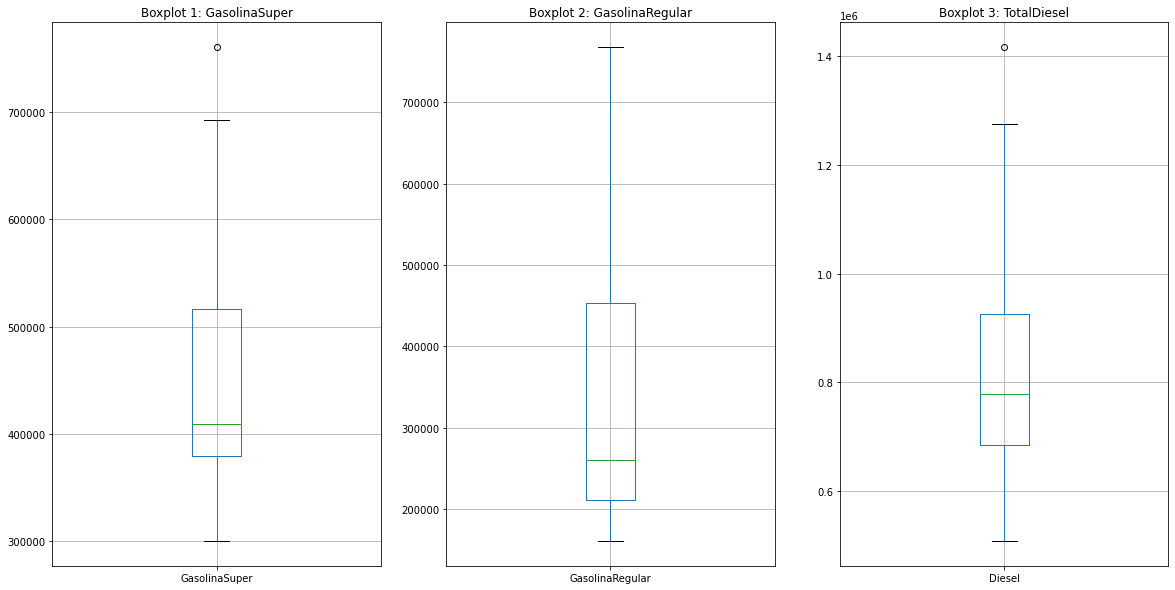

In [ ]:
fig = plt.figure(figsize=(20,10)) 
ax = fig.add_subplot(131)
data_con.boxplot("GasolinaSuper")
ax.set_title("Boxplot 1: GasolinaSuper")
ax = fig.add_subplot(132)
data_con.boxplot("GasolinaRegular")
plt.title('Boxplot 2: GasolinaRegular')
ax = fig.add_subplot(133)
data_con.boxplot("Diesel")
ax.set_title("Boxplot 3: TotalDiesel")
plt.axis('tight')
plt.show()

### Box Plot para Importaciones

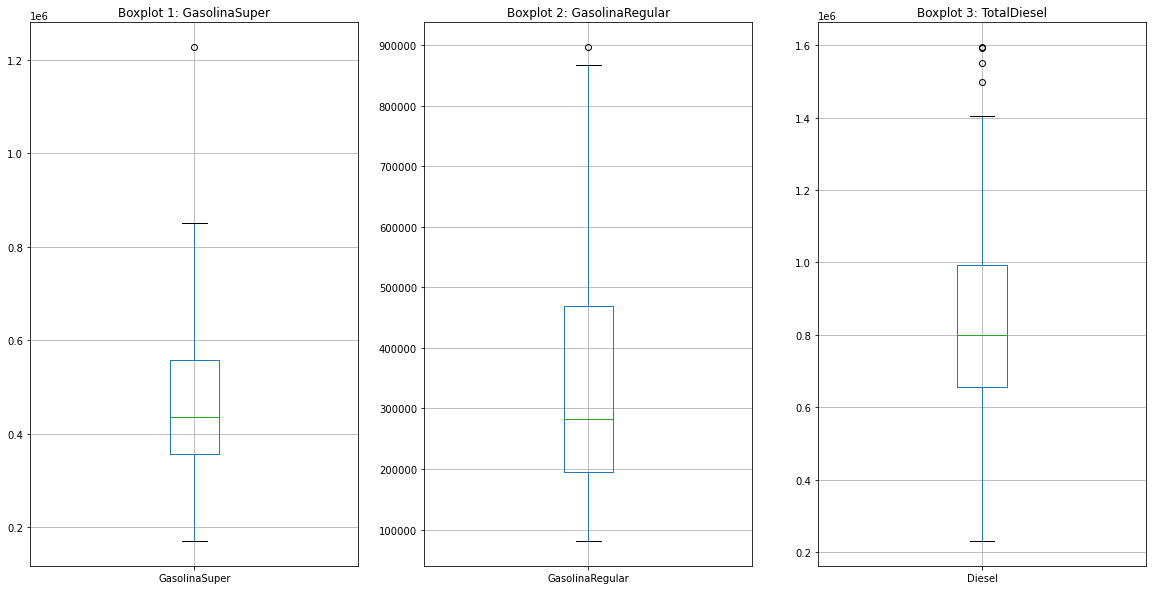

In [ ]:
fig = plt.figure(figsize=(20,10)) 
ax = fig.add_subplot(131)
data_imp.boxplot("GasolinaSuper")
ax.set_title("Boxplot 1: GasolinaSuper")
ax = fig.add_subplot(132)
data_imp.boxplot("GasolinaRegular")
plt.title('Boxplot 2: GasolinaRegular')
ax = fig.add_subplot(133)
data_imp.boxplot("Diesel")
ax.set_title("Boxplot 3: TotalDiesel")
plt.axis('tight')
plt.show()

En general, los diagramas de caja y bigotes muestran que en cada tipo de gasolina existe una distribución normal. A pesar del distanciamiento de los datos de la media, no se presentan muchos datos atípicos. Con este tipo de analisis se pueden obtener series de tiempo que tengan sentido. Además, se pueden obtener distintos comportamientos y puede ser necesario una normalización de datos para poder realizar predicciones de manera correcta.

### Histogramas para Consumo

In [ ]:
columnas = ["GasolinaSuper", "GasolinaRegular", "Diesel"]

<Figure size 1440x720 with 0 Axes>

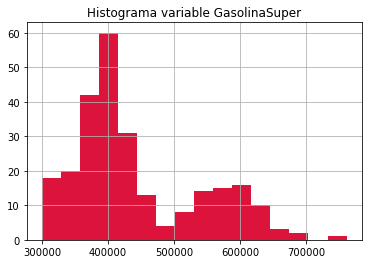

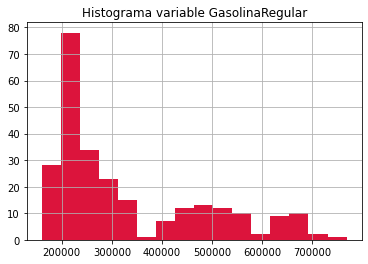

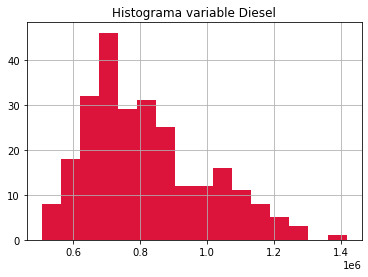

In [ ]:
fig1 = plt.figure(figsize=(20,10)) 
for k in columnas:
    data_con.hist(k, bins = 16, color = "crimson")
    plt.title("Histograma variable " + str(k))

### Histogramas para Importaciones

<Figure size 1440x720 with 0 Axes>

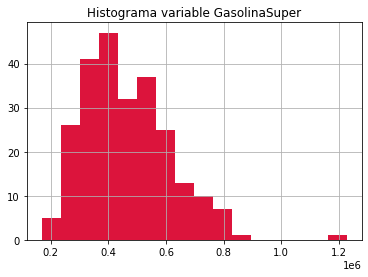

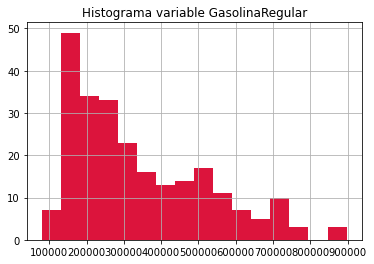

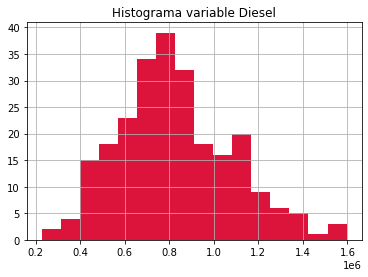

In [ ]:
fig1 = plt.figure(figsize=(20,10)) 
for k in columnas:
    data_imp.hist(k, bins = 16, color = "crimson")
    plt.title("Histograma variable " + str(k))

### Comparación Mensual para cada tipo de Gasolina de consumo

De forma inicial, para el **consumo mensual de gasolina regular** puede observarse que existe un consumo relativamente estable a lo largo de los meses. Puede verse un ligero aumento al final del primer trimestre del año, para luego reducirse significativamente en el primer semestre del año. Luego, vuelve a crecer, aunque no hay estabilidad en ello.

Para el **consumo mensual de gasolina super** inicialmente se observa un cambio en el factor del eje *y*. Si bien este se encuentra una decena por encima del anterior, al analizar los números, vemos que en realidad 

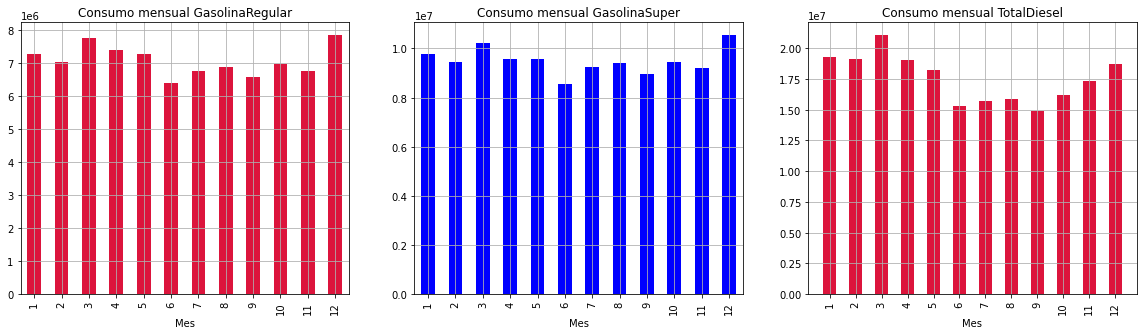

In [ ]:
fig = plt.figure(figsize=(20,5)) 
ax = fig.add_subplot(131)
data_con.groupby('Mes').GasolinaRegular.sum().plot.bar(color = "crimson")
ax.set_title("Consumo mensual GasolinaRegular")
plt.grid()
ax = fig.add_subplot(132)
data_con.groupby('Mes').GasolinaSuper.sum().plot.bar(color = "blue")
ax.set_title("Consumo mensual GasolinaSuper")
plt.grid()
ax = fig.add_subplot(133)
data_con.groupby('Mes').Diesel.sum().plot.bar(color = "crimson")
ax.set_title("Consumo mensual TotalDiesel")
plt.grid()
plt.axis('tight')
plt.show()

### Comparación Mensual para cada tipo de Gasolina de importación

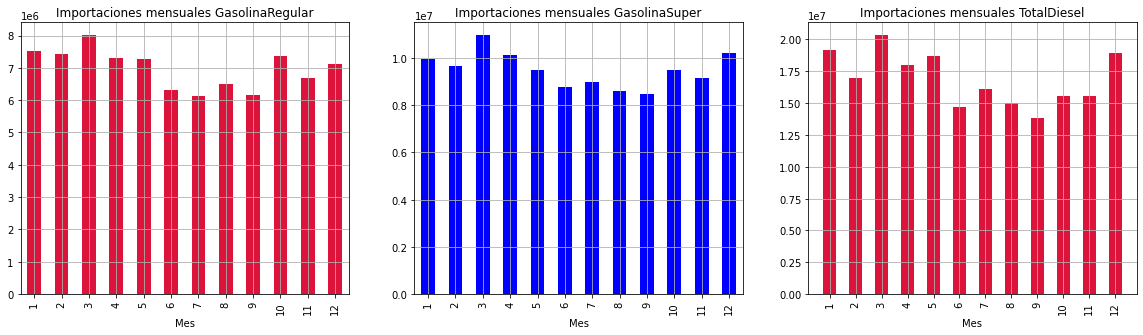

In [ ]:
fig = plt.figure(figsize=(20,5)) 
ax = fig.add_subplot(131)
data_imp.groupby('Mes').GasolinaRegular.sum().plot.bar(color = "crimson")
ax.set_title("Importaciones mensuales GasolinaRegular")
plt.grid()
ax = fig.add_subplot(132)
data_imp.groupby('Mes').GasolinaSuper.sum().plot.bar(color = "blue")
ax.set_title("Importaciones mensuales GasolinaSuper")
plt.grid()
ax = fig.add_subplot(133)
data_imp.groupby('Mes').Diesel.sum().plot.bar(color = "crimson")
ax.set_title("Importaciones mensuales TotalDiesel")
plt.grid()
plt.axis('tight')
plt.show()

### Comparación Anual para cada tipo de Gasolina de consumo

El **consumo anual de gasolina regular** tiene un consumo bajo en los primeros años y luego podemos observar como este va aumentando, formando una gráfica con un sesgo moderado hacia la izquierda. 

En la grafica de **consumo anual de gasolina super** podemos observar que inicia con un consumo mas alto que la gasolina regular, el cual va aumentando moderadamente formando un pequeño sesgo hacia la izquierda. 

En el **consumo anual de Diesel** podemos observar que va en aumento e incluso en cuatro años se mantuvo constante y luego incremento significativamente. 

En estas tres gráficas podemos observar como el consumo disminuye en 2020 que es el año en el que todos nos vimos afectados por la pandemia y en 2021 es mucho mas bajo porque es el año en curso. 

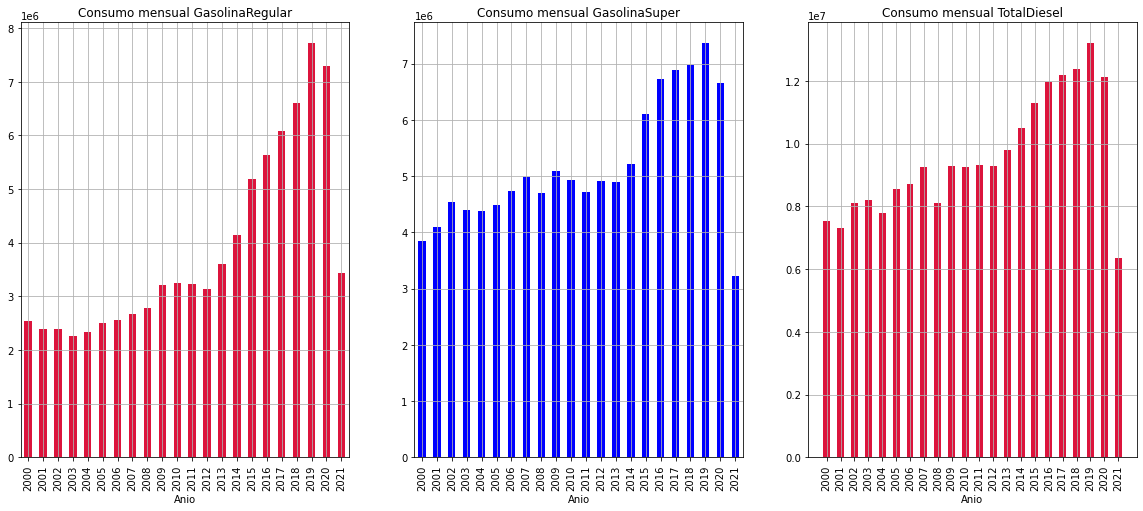

In [ ]:
fig = plt.figure(figsize=(20,8)) 
ax = fig.add_subplot(131)
data_con.groupby('Anio').GasolinaRegular.sum().plot.bar(color = "crimson")
ax.set_title("Consumo mensual GasolinaRegular")
plt.grid()
ax = fig.add_subplot(132)
data_con.groupby('Anio').GasolinaSuper.sum().plot.bar(color = "blue")
ax.set_title("Consumo mensual GasolinaSuper")
plt.grid()
ax = fig.add_subplot(133)
data_con.groupby('Anio').Diesel.sum().plot.bar(color = "crimson")
ax.set_title("Consumo mensual TotalDiesel")
plt.grid()
plt.axis('tight')
plt.show()

### Comparación Anual para cada tipo de Gasolina de Importaciones

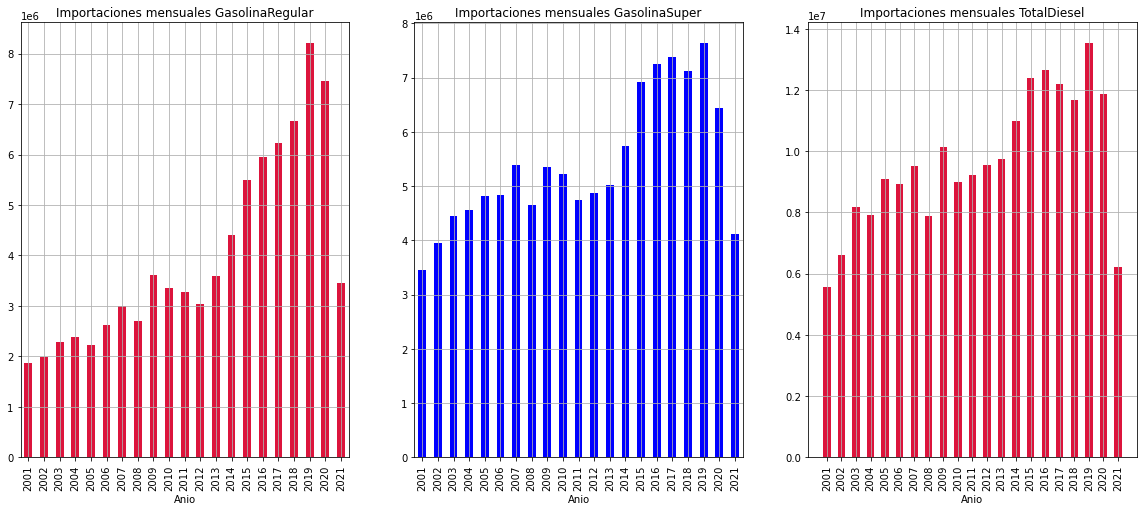

In [ ]:
fig = plt.figure(figsize=(20,8)) 
ax = fig.add_subplot(131)
data_imp.groupby('Anio').GasolinaRegular.sum().plot.bar(color = "crimson")
ax.set_title("Importaciones mensuales GasolinaRegular")
plt.grid()
ax = fig.add_subplot(132)
data_imp.groupby('Anio').GasolinaSuper.sum().plot.bar(color = "blue")
ax.set_title("Importaciones mensuales GasolinaSuper")
plt.grid()
ax = fig.add_subplot(133)
data_imp.groupby('Anio').Diesel.sum().plot.bar(color = "crimson")
ax.set_title("Importaciones mensuales TotalDiesel")
plt.grid()
plt.axis('tight')
plt.show()

### Series de tiempo para Consumo

### Transformamos los datos a tipo fecha

In [ ]:
formato_fecha(data_con)
formato_fecha(data_imp)

In [ ]:
data_con.index = data_con["Fechas"]

In [ ]:
data_imp.index = data_imp["Fechas"]

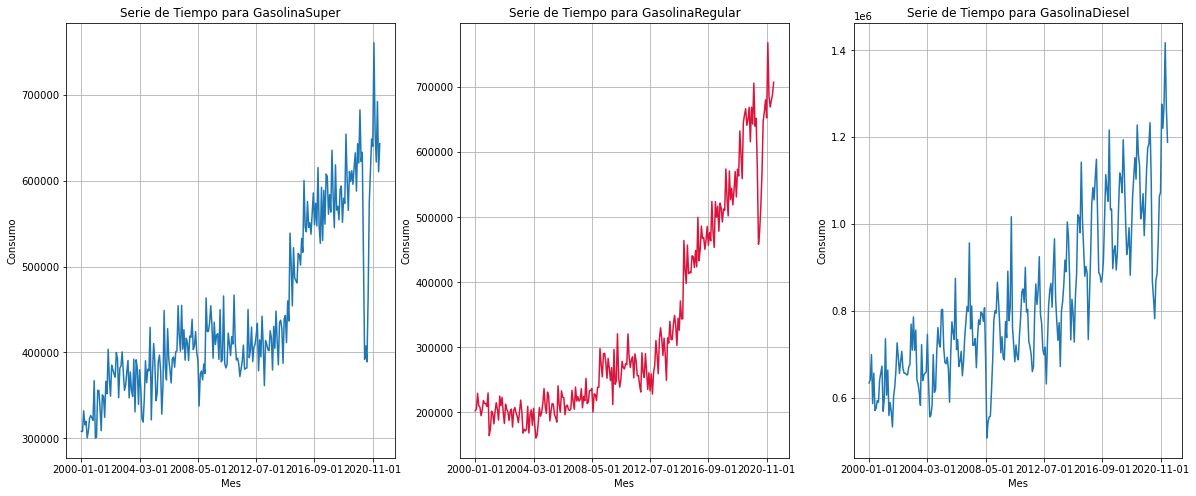

In [ ]:
fig = plt.figure(figsize=(20,8)) 
ax = fig.add_subplot(131)
data_con["GasolinaSuper"].plot()
plt.grid()
plt.title("Serie de Tiempo para GasolinaSuper")
plt.ylabel("Consumo")
plt.xlabel("Mes")
ax = fig.add_subplot(132)
data_con["GasolinaRegular"].plot(color = "crimson")
plt.grid()
plt.title("Serie de Tiempo para GasolinaRegular")
plt.ylabel("Consumo")
plt.xlabel("Mes")
ax = fig.add_subplot(133)
data_con["Diesel"].plot()
plt.grid()
plt.title("Serie de Tiempo para GasolinaDiesel")
plt.ylabel("Consumo")
plt.xlabel("Mes")
plt.axis('tight')
plt.show()

### Series de tiempo para Importaciones

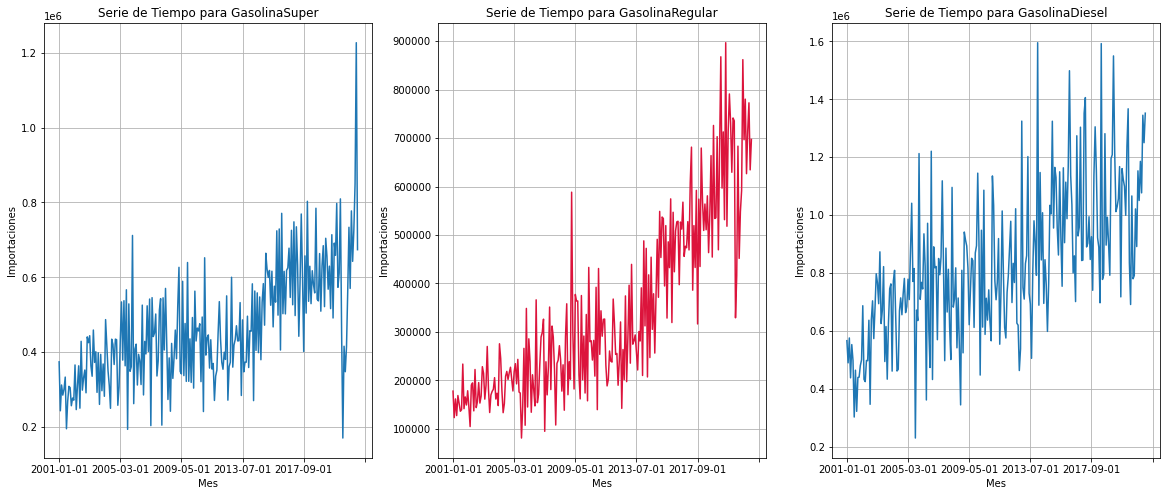

In [ ]:
fig = plt.figure(figsize=(20,8)) 
ax = fig.add_subplot(131)
data_imp["GasolinaSuper"].plot()
plt.grid()
plt.title("Serie de Tiempo para GasolinaSuper")
plt.ylabel("Importaciones")
plt.xlabel("Mes")
ax = fig.add_subplot(132)
data_imp["GasolinaRegular"].plot(color = "crimson")
plt.grid()
plt.title("Serie de Tiempo para GasolinaRegular")
plt.ylabel("Importaciones")
plt.xlabel("Mes")
ax = fig.add_subplot(133)
data_imp["Diesel"].plot()
plt.grid()
plt.title("Serie de Tiempo para GasolinaDiesel")
plt.ylabel("Importaciones")
plt.xlabel("Mes")
plt.axis('tight')
plt.show()

## Descomposición para las series de tiempo

### Consumo: Gasolina Regular

In [ ]:
result=seasonal_decompose(df[''],  model='multiplicable')